# KNN (K-Nearest-Neighbors)

* titanic 데이터셋의 탑승객 데이터를 사용해서 생존여부를 예측해보쟈!
    
  
* 지도학습 : 예측하려는 설명변수(y)를 입력받고, 독립변수(X)가 갖고 있는 카테고리 값 중에서 어느 한 값으로 분류하여 ==> 예측해보자!

# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [2]:
df= sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 데이터 확인하기

In [3]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
129,0,3,male,45.0,0,0,6.9750,S,Third,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
628,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## 필요없는 열 생각해보기

* pclass와 class는 중복
* sex와 who는 중복
* embarked와 embark_town은 중복
* adult_male은 age와 sex로 확인가능함 => 만약 결측값이 있을 시 이를 통해 알 수있음
* alive는 survived와 중복
* alone와 sibsp + parch이 중복

## 형변환 생각해보기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


==> 일단 깔끔하게 다른 열 처리해놓고나서, 마지막에 생각해보자! 

## 데이터 결측치 확인

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* 결측치가 많은 deck 열을 제거
* embark_town은 애초에 embark와 중복되어서 제거하기! 
* age는 중요한 요인이기에 일단 냅두기!

# 전처리하기

In [138]:
# 처리하기 전 혹시 모르니 tmp로 copy하기

tmp = df.copy()

## 삭제 (중복, 결측치)

In [139]:
# 중복되는 열 삭제하기 - who, embark_town, alive, class 삭제
# 결측치많은 열 삭제하기 - deck
tmp.drop(["who", "embark_town", "alive", "deck", "class","alone"], axis=1, inplace=True)
tmp.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


## adult_male 살펴보기

In [140]:
tmp.age[tmp.adult_male==True].min()

16.0

==> 만16세라고해도 adult라고 판명하니 신뢰성이 없는 adult_male이라고 생각하고,  
나중에 age 결측값 채우고 나서 제거하기!

## 결측치 채우기

In [141]:
tmp.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
adult_male      0
dtype: int64

### embarked 결측치

In [142]:
tmp.describe(include="object")

,sex,embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [143]:
print("S 개수 :",len(tmp[tmp.embarked=="S"]))
print("C 개수 :",len(tmp[tmp.embarked=="C"]))
print("Q 개수 :",len(tmp[tmp.embarked=="Q"]))

S 개수 : 644
C 개수 : 168
Q 개수 : 77


In [144]:
print("S가 차지하는 비율은??   ",len(tmp[tmp.embarked=="S"])/len(tmp) *100,"%")

S가 차지하는 비율은??    72.27833894500561 %


In [145]:
from sklearn.impute import SimpleImputer

freq = SimpleImputer(strategy="most_frequent")
tmp.embarked = freq.fit_transform(tmp.loc[:,["embarked"]])

In [146]:
tmp.loc[:,["embarked"]].isnull().sum()

embarked    0
dtype: int64

### age 결측치

In [147]:
# 안내 메세지 안뜨게
import warnings
warnings.filterwarnings(action='ignore')

Text(0.5, 0.98, '나이 value의 분포')

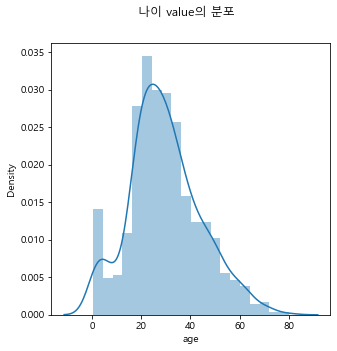

In [148]:
plt.rc("font", family="Malgun Gothic")

plt.figure(figsize=(5,5))
sns.distplot(tmp.age)
plt.suptitle("나이 value의 분포")

In [149]:
# 성인남자가 True인 경우의 age 결측값은 median값으로 채우기!

tmp.age[(tmp.adult_male==True)].median()

#성인 남자는 30살이 중앙값

30.0

In [150]:
#삭제했던 성인남자를 끌어와야하니 임시 데이터프레임만들기 이용하기
tmp.age[(tmp.adult_male==True)&(tmp.age.isnull())]= tmp.age[tmp.adult_male==True].median()

In [151]:
tmp[tmp.adult_male==True].isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
dtype: int64

In [152]:
# 이제 나머지는 성별로 최빈도로 채워주기!
tmp.groupby('sex')['age'].mean()

sex
female    27.915709
male      30.570485
Name: age, dtype: float64

In [153]:
tmp.age[(tmp.age.isnull())&(tmp.sex=='female')] = tmp.age[tmp.sex=='female'].mean()
tmp.age[(tmp.age.isnull())&(tmp.sex=='male')] = tmp.age[tmp.sex=='male'].mean()

In [154]:
# 결측값 대치 되었는지 확인
tmp.age.isnull().sum()

0

In [155]:
# 위에서 썼던 것처럼 adult_male 열은 삭제해주기!

tmp.drop("adult_male", axis=1,inplace=True)
tmp

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,27.915709,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [156]:
# 전체적으로 다 되었는지 확인
tmp.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

# 인코딩

In [157]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

In [158]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [159]:
ohe_sex = ohe.fit_transform(tmp.sex.values.reshape(-1,1))

In [160]:
ohe_sex_col = ohe.get_feature_names(["sex"])
ohe_sex_col

array(['sex_female', 'sex_male'], dtype=object)

In [161]:
ohe_sex_df = pd.DataFrame(data=ohe_sex.toarray(), columns=ohe_sex_col)
ohe_sex_df

,sex_female,sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [162]:
tmp = pd.concat([tmp, ohe_sex_df], axis=1)
tmp.drop("sex",axis=1, inplace=True) #기존 sex 열 삭제
tmp.head()

,survived,pclass,age,sibsp,parch,fare,embarked,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,0.0,1.0
1,1,1,38.0,1,0,71.2833,C,1.0,0.0
2,1,3,26.0,0,0,7.9250,S,1.0,0.0
3,1,1,35.0,1,0,53.1000,S,1.0,0.0
4,0,3,35.0,0,0,8.0500,S,0.0,1.0


In [163]:
# 원핫인코딩
ohe_embarked= ohe.fit_transform(tmp.embarked.values.reshape(-1,1))
# 열 이름
ohe_embarked_col = ohe.get_feature_names(["embarked"])
# 데이터프레임 만들기
ohe_embarked_df= pd.DataFrame(data=ohe_embarked.toarray(), columns=ohe_embarked_col)
ohe_embarked_df.head()

,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [164]:
tmp= pd.concat([tmp, ohe_embarked_df], axis=1)
tmp.drop("embarked", axis=1, inplace=True) # 기존 embarked 열 삭제
tmp.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


# X / y 선택하기

In [188]:
# 독립변수
X= tmp.drop("survived", axis=1)

# 종속변수
y=tmp.survived

In [189]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

# 정규화하기

In [190]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X = st.fit_transform(X)
X

array([[ 0.82737724, -0.58719577,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.64335383,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.27955837, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -0.13222245,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.27955837, -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.18189773, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.62380254]])

# Train / test 나누기

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.3,
                                                  random_state=10)

In [192]:
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (623, 10)
test data 개수:  (268, 10)


# KNN모형 학습

In [194]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
# 모형 객체 생성 
# k=5로 설정하여, 가장 속성이 비슷한 5개의 이웃을 찾기!
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [196]:
y_hat = knn.predict(X_test)

In [201]:
# 예측값
y_hat[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [203]:
# 실제 test값
y_test.values[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

# 검증하기

## Confusion Matrix로 모형 성능 평가하기!

In [204]:
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
knn_matrix

array([[154,  20],
       [ 28,  66]], dtype=int64)

[[TN,FP], [FN,TP]] 형태로 변환된다!  
  
TN= 154명, FP= 20명, FN= 28명, TP= 66명

<AxesSubplot:>

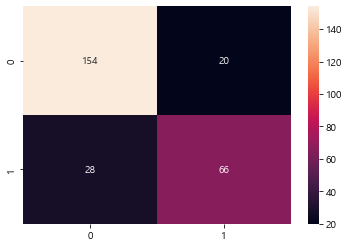

In [207]:
sns.heatmap(knn_matrix, annot=True, fmt="g")

## 여러 평가지표로 모형 성능 평가하기!

In [212]:
knn_report= metrics.classification_report(y_test, y_hat)

In [214]:
knn_report.split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       0.85      0.89      0.87       174',
 '           1       0.77      0.70      0.73        94',
 '',
 '    accuracy                           0.82       268',
 '   macro avg       0.81      0.79      0.80       268',
 'weighted avg       0.82      0.82      0.82       268',
 '']

생존자(1)의 예측 f1-score 정확도는 **0.76!**